# Seattle AirBnB Data Analysis

Introduction
We are using the dataset Of Seattle AirBnb to make this project

1. Business Understanding

This notebook follows the CRISP-DM process to analyze the Seattle AirBnb Open Data on Kaggle.

These are the 8guiding questions for our analysis:

What are the listing_ids that charge the most?

Which month has the highest average price?

What is the distribution of host response time?

What are the most popular Neighbourhoods in Seattle?

What is the average price by cleansed nieghbourhood?

Visualization by Heatmap to see Correlation

What is the Booking Ratio for 30 Days Depending On room_type?

What is the Booking Ratio for 30 Days Depending On property_type?

What is the most expensive Average Listing price across Seattle neighbourhoods?

What is the least expensive Average Listing price across Seattle neighbourhoods?

2. Data Understanding

For the purposes of this analysis, the focus will be limited to the Listings data exclusively since that is all that is needed to address the three guiding questions.

# Gathering

In [1]:
# Import python libraries
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar

%matplotlib inline

In [2]:
df_cal=pd.read_csv('calendar.csv')
df_lis=pd.read_csv('listings.csv')
df_rev=pd.read_csv('reviews.csv')

In [3]:
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
df_cal.shape

(1393570, 4)

In [5]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [6]:

df_lis.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [7]:
df_lis.shape

(3818, 92)

In [8]:
df_lis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [9]:
# Calculating Percentage of Null values in Listings
pd.DataFrame(np.mean(df_lis.isnull()), columns=['null_count_percent']).sort_values(by='null_count_percent', ascending=False)

C:\Users\Rohit.Ojha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,null_count_percent
license,1.000000
square_feet,0.974594
monthly_price,0.602672
security_deposit,0.511262
weekly_price,0.473808
...,...
room_type,0.000000
accommodates,0.000000
bed_type,0.000000
amenities,0.000000


In [10]:
np.sum(df_lis[[i for i in df_lis.columns.tolist() if 'neighbourhood' in i]].isnull())

host_neighbourhood              300
neighbourhood                   416
neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
dtype: int64

In [11]:
df_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [12]:

df_rev.shape

(84849, 6)

In [13]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


# Cleaning

In [14]:
# Changing price in calender from object type to float
df_cal['price'] = df_cal['price'].str.replace("[$, ]", "").astype("float")

C:\Users\Rohit.Ojha\AppData\Local\Temp\ipykernel_24212\1697669697.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cal['price'] = df_cal['price'].str.replace("[$, ]", "").astype("float")


In [15]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   listing_id  1393570 non-null  int64  
 1   date        1393570 non-null  object 
 2   available   1393570 non-null  object 
 3   price       934542 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 42.5+ MB


In [16]:
#converting the date column into datetime
df_cal['date'] = pd.to_datetime(df_cal['date'])

In [17]:
#creating a column for day of week
df_cal['day of week'] = df_cal['date'].dt.day_name()
#creating a column for month of year
df_cal['month'] = df_cal['date'].dt.month
df_cal['month'] = df_cal['month'].apply(lambda x: calendar.month_abbr[x])
df_cal.head()

,listing_id,date,available,price,day of week,month
0,241032,2016-01-04,t,85.0,Monday,Jan
1,241032,2016-01-05,t,85.0,Tuesday,Jan
2,241032,2016-01-06,f,NaN,Wednesday,Jan
3,241032,2016-01-07,f,NaN,Thursday,Jan
4,241032,2016-01-08,f,NaN,Friday,Jan


# Lisitngs Cleaning

In [18]:
# Changing price in calender from object type to float
df_lis['price'] = df_lis['price'].str.replace("[$, ]", "").astype("float")

C:\Users\Rohit.Ojha\AppData\Local\Temp\ipykernel_24212\2817449117.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_lis['price'] = df_lis['price'].str.replace("[$, ]", "").astype("float")


In [19]:
df_lis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [20]:
# Drop columns not relevant to our analyses
col = ['summary','name','space','description','experiences_offered','neighborhood_overview','notes','transit',       
       'thumbnail_url','medium_url','picture_url','xl_picture_url','host_url','host_about','host_thumbnail_url',
       'host_picture_url','street', 'neighbourhood_group_cleansed', 
       'square_feet', 'calendar_updated','requires_license', 'weekly_price', 'monthly_price', 
       'first_review','last_review','host_name','host_location','scrape_id','license','review_scores_rating' ,'review_scores_accuracy' 
       ,'review_scores_cleanliness','review_scores_checkin' ,'review_scores_communication' ,'review_scores_location','review_scores_value']

df_lis.drop(col, axis =1, inplace=True)

In [21]:
df_lis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   last_scraped                      3818 non-null   object 
 3   host_id                           3818 non-null   int64  
 4   host_since                        3816 non-null   object 
 5   host_response_time                3295 non-null   object 
 6   host_response_rate                3295 non-null   object 
 7   host_acceptance_rate              3045 non-null   object 
 8   host_is_superhost                 3816 non-null   object 
 9   host_neighbourhood                3518 non-null   object 
 10  host_listings_count               3816 non-null   float64
 11  host_total_listings_count         3816 non-null   float64
 12  host_v

In [22]:
df_lis.head()

,id,listing_url,last_scraped,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,availability_365,calendar_last_scraped,number_of_reviews,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,2016-01-04,956883,2011-08-11,within a few hours,96%,100%,f,Queen Anne,...,346,2016-01-04,207,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,2016-01-04,5177328,2013-02-21,within an hour,98%,100%,t,Queen Anne,...,291,2016-01-04,43,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,2016-01-04,16708587,2014-06-12,within a few hours,67%,100%,f,Queen Anne,...,220,2016-01-04,20,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,2016-01-04,9851441,2013-11-06,NaN,NaN,NaN,f,Queen Anne,...,143,2016-01-04,0,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,2016-01-04,1452570,2011-11-29,within an hour,100%,NaN,f,Queen Anne,...,365,2016-01-04,38,WASHINGTON,f,strict,f,f,1,0.89


# Reviews Cleaning

In [23]:
# Drop null review since that is the key column in this table and can't be imputed; also null values are only a few 
df_rev.dropna(subset=['comments'], inplace=True)

In [24]:
# Fix datatypes for certain columns 
df_rev['date'] = pd.to_datetime(df_rev['date'])

In [25]:
# Creating a new feature extracting Month of the date
df_rev['month'] = df_rev['date'].dt.month
df_rev['month'] = df_rev['month'].apply(lambda x: calendar.month_abbr[x])

In [26]:
df_rev.head(1)

,listing_id,id,date,reviewer_id,reviewer_name,comments,month
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,Jul


# Analyzing and Visualizing

Q.1 What are the listing_ids that charge the most?

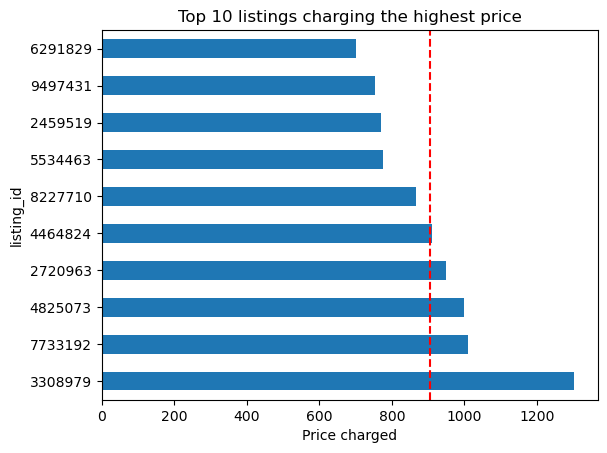

In [27]:
### High priced charged listings
mean_lis=df_cal.groupby('listing_id')['price'].mean()
mean_lis.nlargest(10).plot(kind="barh");
plt.xlabel('Price charged')
plt.axvline(mean_lis.nlargest(10).mean(),color='r',linestyle='--')
plt.title("Top 10 listings charging the highest price");

Q.2 Which month has the highest average price?

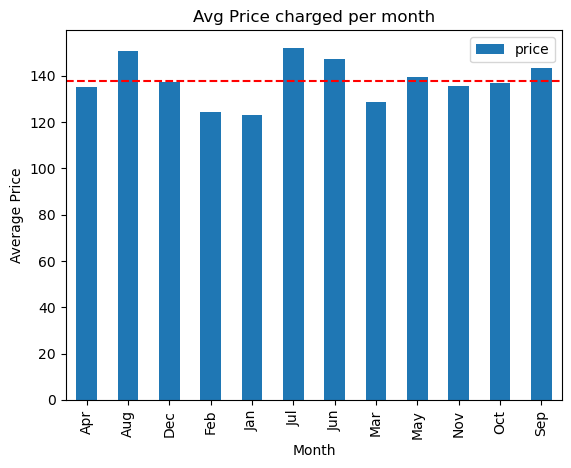

In [28]:
### Months with highest price
mth_lis=df_cal.groupby('month')['price'].mean()
mth_lis.plot(kind="bar");
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title("Avg Price charged per month")
plt.axhline(mth_lis.mean(),color='r',linestyle='--')##average price for 2016= $92
plt.legend();
plt.savefig('9.png',bbox_inches='tight')

Q.3 What is the distribution of host response time?

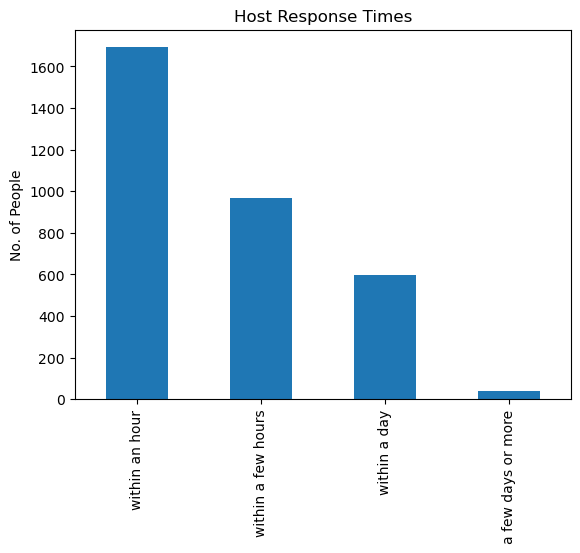

In [29]:
# Explore Categorical Feature - host_response_time
host_response_vals = df_lis['host_response_time'].value_counts()
(host_response_vals).plot(kind="bar");
plt.title("Host Response Times");
plt.ylabel('No. of People');
plt.savefig('1.png')

Q.4 What are the most popular Neighbourhoods in Seattle?

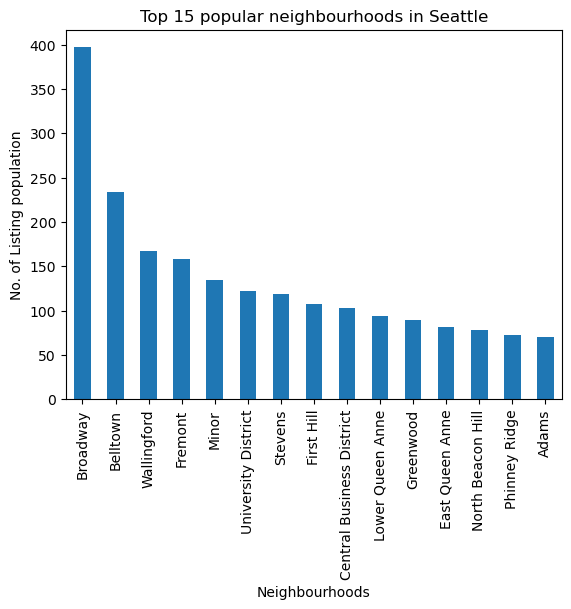

In [30]:
###identifying the top 15 popular neighbour hoods
local=df_lis['neighbourhood_cleansed'].value_counts()

((local[0:15]).plot(kind="bar"))
plt.ylabel('No. of Listing population')
plt.xlabel('Neighbourhoods')
plt.title("Top 15 popular neighbourhoods in Seattle");
plt.savefig('2.png',bbox_inches='tight')

Q.5 What is the average price by cleansed nieghbourhood?

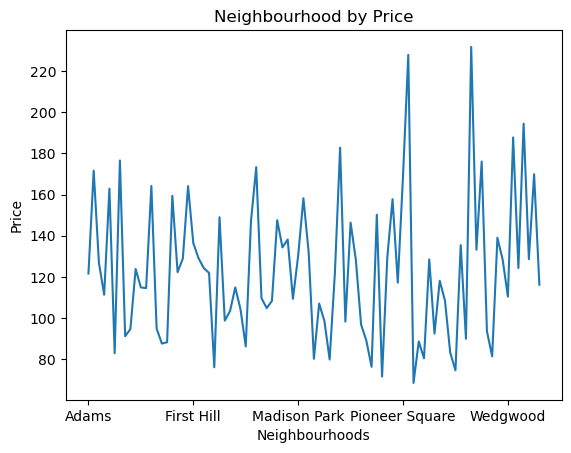

In [31]:
### Average price per neighbourhood
neighbourhood_price=df_lis.groupby('neighbourhood_cleansed')['price'].mean().plot()
plt.xlabel('Neighbourhoods')
plt.ylabel('Price')
plt.title('Neighbourhood by Price');
plt.savefig('3.png')


Q. Visualization by Heatmap to see Correlation

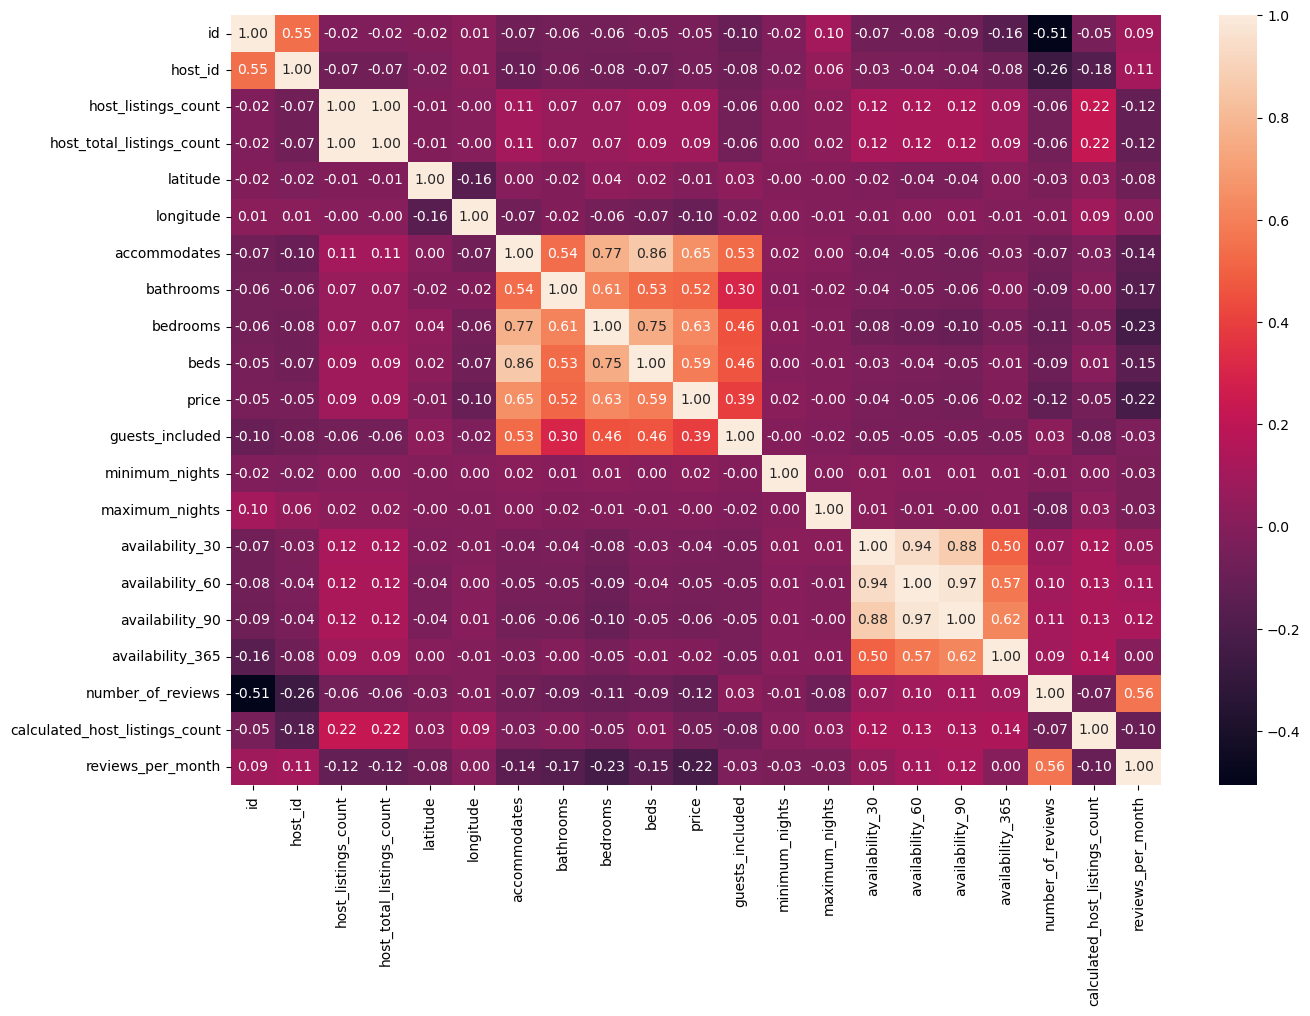

In [32]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_lis.corr(), annot=True, fmt='.2f');
plt.savefig('4.png',bbox_inches='tight')

In [33]:
#Below code, creates the column 'booking_ratio_30' which gives info about the booking percentage in the next 30 days
df_lis['booking_ratio_30'] = 1 - (df_lis['availability_30']/30)

Q.6 What is the Booking Ratio for 30 Days Depending On room_type?

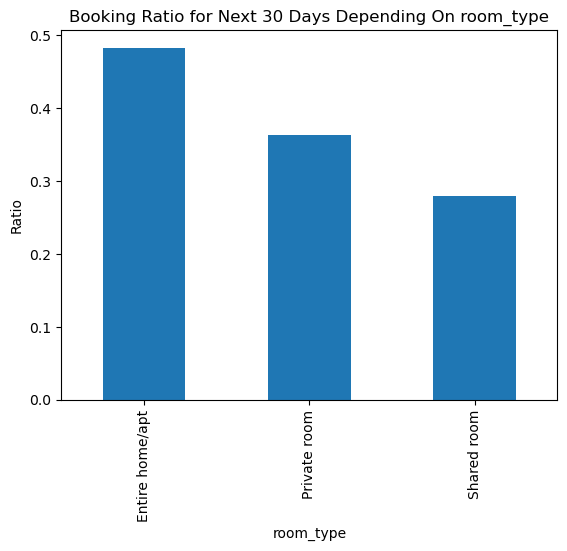

<Figure size 640x480 with 0 Axes>

In [34]:
#Below code plots a bar chart to visualize booking ratios of different room types for next 30 days
(df_lis.groupby(['room_type'])['booking_ratio_30'].mean().sort_values(ascending=False)).plot(kind='bar', legend=None);
plt.title('Booking Ratio for Next 30 Days Depending On room_type')
plt.ylabel('Ratio')
plt.show();
plt.savefig('5.png',bbox_inches='tight');

Q.7 What is the Booking Ratio for 30 Days Depending On property_type?

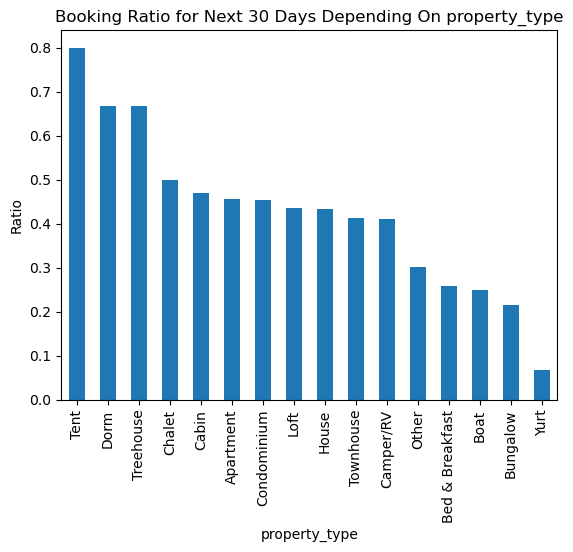

<Figure size 640x480 with 0 Axes>

In [35]:
#Below code plots the booking ratios of different property types for next 30 days
(df_lis.groupby(['property_type'])['booking_ratio_30'].mean().sort_values(ascending=False)).plot(kind='bar', legend=None)
plt.title('Booking Ratio for Next 30 Days Depending On property_type');
plt.ylabel('Ratio')
plt.show();
plt.savefig('6.png',bbox_inches='tight')

Q.8 Which is the most expenisve neighbourhood across Seattle ?

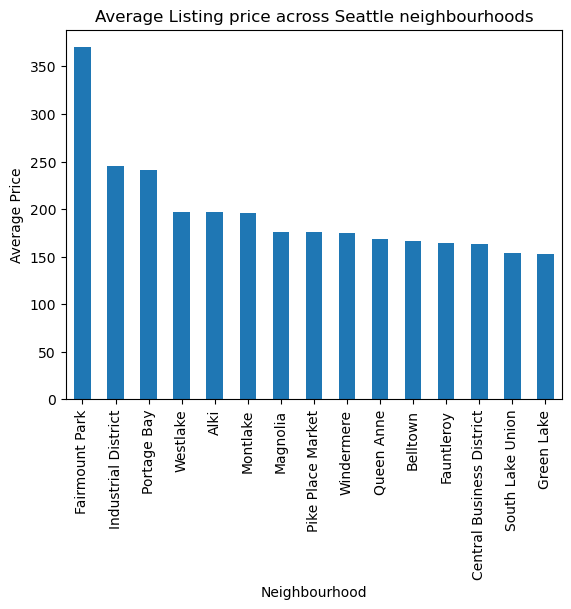

In [36]:
# grouped neighbourhood 
mean_prc=df_lis.groupby('neighbourhood')['price'].mean()
mean_prc.nlargest(15).plot(kind="bar");
plt.title("Average Listing price across Seattle neighbourhoods");
plt.xlabel('Neighbourhood');
plt.ylabel('Average Price');
plt.savefig('7.png',bbox_inches='tight')

Q.9 What is the least expensive Neighbourhood across Seattle ?

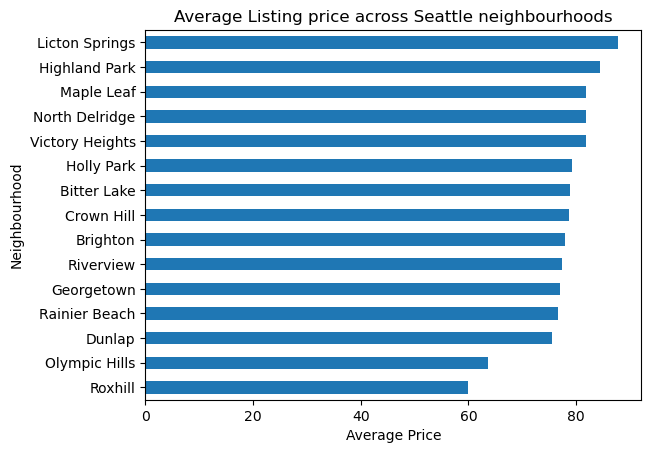

In [37]:
# grouped neighbourhood 
mean_prc.nsmallest(15).plot(kind="barh");
plt.title("Average Listing price across Seattle neighbourhoods");
plt.ylabel('Neighbourhood');
plt.xlabel('Average Price');
plt.savefig('8.png',bbox_inches='tight')

# Conclusion

The following key findings from the analysis are summarized below:

1.It was found that the peak season in Seattle is during the summer months from June to August, with the absolute peak being in July.

2.The "Fairmount Park" neighborhood was the priciest neighborhood in Seattle, followed by Industrial District. Roxhill was the cheapest.

3.Looking further at neighborhoods and property types, I found out that Tents are the most booked by property type following by dorm and tenthouse.

4.3308979 id charges the most. Average charged price of top 10 ids is 900.

5.Most of the people contact within an hour which shows how much id the popularity of AirBnB

6.The most popular Neighbourhood in Seattle is Broadway which is far higher than the following Belltown.

7.There is many fluctuations in the price by the cleansed neighbourhood but we can see that area between Pioneer Square and Wedgewood is most expensive following by Pioneer Square. But we can also see some areas around Pioneer Square is least expensive

8.Most of the booking were made for Entire Home/Apt. following by Private room and least for Shared Room